In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
salary = pd.read_csv("C:/Users/Sowmya Ganesh/Documents/Salary_Data.csv")
salary.head(3)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731


In [4]:
#creating a copy of actual data
salary_hike = salary.copy()
print(salary_hike)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


#### Basic information check

In [5]:
print(salary_hike.shape)

(30, 2)


In [6]:
print(salary_hike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None


In [7]:
print(salary_hike.dtypes)

YearsExperience    float64
Salary               int64
dtype: object


In [8]:
print(salary_hike.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


#### EDA(Exploratory Data Analysis)

##### To find the correlation between Years of Experience and  Salary received

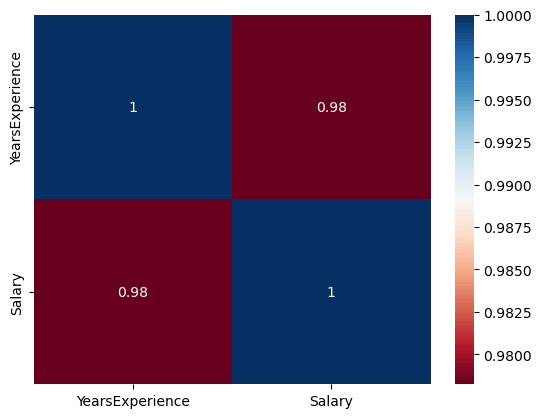

In [9]:
sns.heatmap(salary_hike[['YearsExperience','Salary']].corr(),annot=True,cmap='RdBu',cbar=True)
plt.savefig("Salary_hike_corr.png",dpi=150)

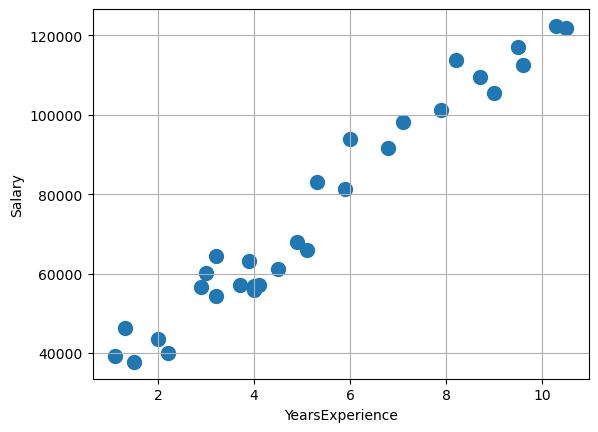

In [10]:
salary_hike.plot(x="YearsExperience",y="Salary",kind="scatter",s=100,grid=True)
plt.savefig("Salary_hike_scatter.png",dpi=150)


# Simple Linear Regression

## Objective - To build a prediction model for Salary 
#### The dependent variable is Salary as we are predicting the salary based on the Experience.
#### X=Years of Experience
#### y=Salary

In [11]:
y=salary_hike[['Salary']]
print(y.head(2))

   Salary
0   39343
1   46205


In [12]:
X=salary_hike[['YearsExperience']]
print(X.head(2))

   YearsExperience
0              1.1
1              1.3


In [13]:
from sklearn. model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=15)

In [14]:
X_train.head(3)

,YearsExperience
1,1.3
2,1.5
29,10.5


In [15]:
y_train.head(3)

,Salary
1,46205
2,37731
29,121872


In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24, 1), (6, 1))

In [17]:
from sklearn.linear_model import LinearRegression
salary_model = LinearRegression()
print(salary_model)

LinearRegression()


In [18]:
train_salary_model = salary_model.fit(X_train,y_train)
print(train_salary_model)

LinearRegression()


In [19]:
pred=train_salary_model.predict(X_test)
pred

array([[ 74275.88079276],
       [ 68602.53908487],
       [116825.94360193],
       [100751.47542958],
       [ 82785.8933546 ],
       [ 81840.33640328]])

In [20]:
y_test

,Salary
16,66029
14,61111
27,112635
22,101302
19,93940
18,81363


In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.8697012433817218

In [22]:
intercept = train_salary_model.intercept_
slope = train_salary_model.coef_
print('Intercept:',intercept)
print("Slope:",slope)

Intercept: [26052.47627571]
Slope: [[9455.56951315]]


The coefficient of determination of this model is 0.87
This is nearly a strong model as the R_square value is near to 1.